In [1]:
# from ensemble_learning import RandomForest, accuracy
from ensemble_learning import DecisionTree, accuracy

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
class Bagging(object):
    
    def __init__(self, num_trees=10):
        
        self.num_trees = num_trees
        
    def fit(self, X, y, m=None):
        
        # if m is not specified set m to the number of columns in X
        if not m:
            m = X.shape[0]
        
        # make random selection of choices for each decison tree
#         self.sub_idx = [np.random.randint(X.shape[0], size=m) for i in range(self.num_trees)]
        
        self.trees=[]
        for i in range(self.num_trees):
            
            bootstrap = np.random.randint(X.shape[0], size=m)
            
            X_boot = X[bootstrap].copy()
            y_boot = y[bootstrap].copy()
            
            t = DecisionTree()
            t.fit(X_boot, y_boot)
            self.trees.append(t)
            
    def predict(self, X):
        
        # get individual predictions for each tree
        pred=[]
        for i, t in enumerate(self.trees):
            
#             X_sub = X[:, self.sub_idx[i]].copy()
            pred.append(t.predict(X))
            
        pred = np.array(pred).T
        
        # vote for true prediction
        y_pred=[]
        for i in range(len(pred)):
            val, cnt = np.unique(pred[i], return_counts=True)
            y_pred.append(val[cnt.argmax()])
            
        return np.array(y_pred)

In [4]:
# read data
cols = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']
df_train = pd.read_csv('../data/bank/train.csv', names=cols)

# process numeric input
medians = df_train.median()

for col in medians.index:
    df_train[col] = df_train[col].apply(lambda x: x > medians[col])
    
# process labels
label_dict={'yes': 1, 'no': -1}
df_train['y'] = df_train['y'].map(label_dict)

In [5]:
X = df_train.drop('y', axis=1).values
y = df_train['y'].values

In [6]:
model = Bagging(num_trees=50)
model.fit(X, y)

y_pred = model.predict(X)
accuracy(y_pred, y)

0.9864

In [11]:
n_trees = np.arange(0, 21, 5)
n_trees[0] = 1
n_trees

array([ 1,  5, 10, 15, 20])

In [12]:
acc=[]

for i in n_trees:
    print(f'Ntree {i}')

    bag = Bagging(num_trees=i)
    bag.fit(X, y)

    y_pred = bag.predict(X)
    acc.append(accuracy(y_pred, y))
    del(bag)

Ntree 1
Ntree 5
Ntree 10
Ntree 15
Ntree 20


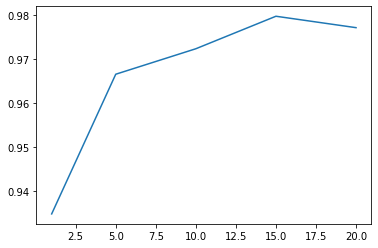

In [13]:
plt.plot(n_trees, acc)